# Interview Instructions

During this interview, the interviewer is going to give you a dataset, some background information, and a question that we would like to answer using the dataset. Then, the interviewer will observe how you frame the problem, how you explore different features, and how you execute on a simple model within a short time frame. You may ask the interviewer for help or use the internet to search for function syntax.

For this interview, please load the accompanying csv file in Jupyter Notebook or R Studio and make sure the data is loaded correctly.

# Background
Rotten Tomatoes is one of the most popular film websites, which combines movie information, critics’ reviews and audience reviews. Critics’ reviews and ratings are collected from designated critics and top critics who are registered on the Rotten Tomatoes site, while audience reviews and rating contain information submitted by users of the site, who may include critics and top critics on the site.    

Movies are divided into three rotten tomato categories -- ‘Rotten’, ‘Fresh’, or ‘Certified Fresh’ -- based on critics’ reviews. The attached dataset includes 8,701 movies with attributes such as movie description, genre, cast and directors, critic consensus, rating from critics and general audience, as well as the rotten tomato category for the movie. 

The goal of this interview is to explore what features predict if a movie is considered bad (‘Rotten’) or good (‘Fresh’ or ‘Certified Fresh’) by critics (tomatometer_status column in the dataset).

# Data Description
- rotten_tomatoes_link: URL of the movie on Rotten Tomatoes
- movie_title 
- movie_info: text containing summary information on the movie
- critics_consensus: text containing summary of critic consensus on the movie, if available 
- poster_image_url
- rating: MPAA rating, e.g., PG, PG-13, R   
- genre: Comedy, Action, Drama, etc. 
- directors: text containing comma-separated list of directors
- writers: text containing comma-separated list of writers
- cast: text containing comma-separated list of actors
- in_theaters_date: date opening in cinemas
- on_streaming_date: date when movie was made available on streaming services
- studio_name: e.g., Paramount, Warner Bros
- tomatometer_status: Certified Fresh, Fresh, or Rotten, based on critics’ reviews
- tomatometer_rating: average score based on critics’ reviews (0 to 100)
- tomatometer_count: number of votes by critics
- audience_status: Upright (good) or Spilled (bad), based on audience votes
- audience_rating: average audience score (0 to 100)
- audience_count: number of votes by audience
- audience_top_critics_count: number of audience reviews (rotten or fresh) from top critics
- audience_fresh_critics_count: number of fresh audience reviews from critics (top and non-top)
- audience_rotten_critics_count: number of rotten audience reviews from critics (top and non-top)



In [12]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('./src')
pd.set_option('display.width', 1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [14]:
from eda import bivariate_plot, col_types, impute_missing, missing_value_summary, data_summary,two_group_histplot, heatmap_corr
from sklearn_utils import coef_df, f_classif, logistic_reg_coef_df, univariate_f_classif
from sklearn_utils import vif, var_importance, clf_metrics

In [11]:
## Loading data

raw_data = pd.read_csv('data/rotten_tomatoes_movies.csv'
                       #,nrows=10
                      )
raw_data.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/the_freshman,The Freshman (College Days),One of Harold Lloyd's best feature-length come...,NaN,https://resizing.flixster.com/UPJ5dR_5-Crx4XEQ...,NR,"Classics, Comedy","Fred Newmeyer, Sam Taylor","Ted Wilde, Tim Whelan Sr., Sam Taylor, Lex Nea...","Harold Lloyd, Jobyna Ralston, Brooks Benedict,...",...,Criterion Collection,Fresh,93,15,Upright,79.0,310.0,5,14,1
1,/m/hit_by_lightning,Hit By Lightning,RICKY MILLER a sweet 40-plus manager of a Denn...,NaN,https://resizing.flixster.com/B5P7YAAPZg59zPjo...,NR,"Comedy, Romance",Ricky Blitt,Ricky Blitt,"Jon Cryer, Will Sasso, Stephanie Szostak, Alex...",...,Gravitas Ventures,Rotten,11,9,Spilled,19.0,196.0,5,1,8
2,/m/day_after_tomorrow,The Day After Tomorrow,What if we are on the brink of a new Ice Age? ...,The Day After Tomorrow is a ludicrous popcorn ...,https://resizing.flixster.com/yGQTvn2L65wzv5ov...,PG-13,"Action & Adventure, Drama, Mystery & Suspense,...",Roland Emmerich,"Jeffrey Nachmanoff, Roland Emmerich","Dennis Quaid, Jake Gyllenhaal, Emmy Rossum, Da...",...,20th Century Fox,Rotten,44,219,Spilled,50.0,32749429.0,46,97,122
3,/m/born_romantic,Born Romantic,"In modern-day London, three men and three wome...",NaN,https://resizing.flixster.com/nYQ8ZAn25oCg3Kgm...,R,"Art House & International, Comedy, Drama",David Kane,David Kane,"Craig Ferguson, Jane Horrocks, Adrian Lester, ...",...,MGM,Rotten,58,31,Spilled,56.0,1767.0,10,18,13
4,/m/dangerous_minds,Dangerous Minds,"In this drama, a school teacher discovers that...",Rife with stereotypes that undermine its good ...,https://resizing.flixster.com/QkPLsiJuu8S0LkT8...,R,Drama,John N. Smith,Ronald Bass,"Michelle Pfeiffer, George Dzundza, Courtney B....",...,Disney,Rotten,28,39,Upright,64.0,102991.0,12,11,28


In [16]:
to_drop = ['rotten_tomatoes_link', 'movie_title','poster_image_url']
raw_data = raw_data.drop(to_drop, axis = 1)
raw_data.head()

,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,One of Harold Lloyd's best feature-length come...,NaN,NR,"Classics, Comedy","Fred Newmeyer, Sam Taylor","Ted Wilde, Tim Whelan Sr., Sam Taylor, Lex Nea...","Harold Lloyd, Jobyna Ralston, Brooks Benedict,...",9/20/25,3/25/14,70.0,Criterion Collection,Fresh,93,15,Upright,79.0,310.0,5,14,1
1,RICKY MILLER a sweet 40-plus manager of a Denn...,NaN,NR,"Comedy, Romance",Ricky Blitt,Ricky Blitt,"Jon Cryer, Will Sasso, Stephanie Szostak, Alex...",10/31/14,4/21/15,90.0,Gravitas Ventures,Rotten,11,9,Spilled,19.0,196.0,5,1,8
2,What if we are on the brink of a new Ice Age? ...,The Day After Tomorrow is a ludicrous popcorn ...,PG-13,"Action & Adventure, Drama, Mystery & Suspense,...",Roland Emmerich,"Jeffrey Nachmanoff, Roland Emmerich","Dennis Quaid, Jake Gyllenhaal, Emmy Rossum, Da...",5/28/04,10/12/04,124.0,20th Century Fox,Rotten,44,219,Spilled,50.0,32749429.0,46,97,122
3,"In modern-day London, three men and three wome...",NaN,R,"Art House & International, Comedy, Drama",David Kane,David Kane,"Craig Ferguson, Jane Horrocks, Adrian Lester, ...",4/26/01,5/21/02,97.0,MGM,Rotten,58,31,Spilled,56.0,1767.0,10,18,13
4,"In this drama, a school teacher discovers that...",Rife with stereotypes that undermine its good ...,R,Drama,John N. Smith,Ronald Bass,"Michelle Pfeiffer, George Dzundza, Courtney B....",8/11/95,7/13/99,99.0,Disney,Rotten,28,39,Upright,64.0,102991.0,12,11,28


In [18]:
raw_data.shape

(8701, 20)

In [17]:
raw_data.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8701 entries, 0 to 8700
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   movie_info                     8688 non-null   object 
 1   critics_consensus              4380 non-null   object 
 2   rating                         8701 non-null   object 
 3   genre                          8694 non-null   object 
 4   directors                      8640 non-null   object 
 5   writers                        7998 non-null   object 
 6   cast                           8550 non-null   object 
 7   in_theaters_date               8274 non-null   object 
 8   on_streaming_date              8701 non-null   object 
 9   runtime_in_minutes             8628 non-null   float64
 10  studio_name                    8491 non-null   object 
 11  tomatometer_status             8701 non-null   object 
 12  tomatometer_rating             8701 non-null   i

In [19]:
raw_data['tomatometer_status'].value_counts()

Rotten             3779
Fresh              3375
Certified Fresh    1547
Name: tomatometer_status, dtype: int64

In [24]:
raw_data['tm_status'] = raw_data.apply(lambda r: 0 if r['tomatometer_status'] == 'Rotten' else 1, axis =1)
raw_data.head()

,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,tm_status
0,One of Harold Lloyd's best feature-length come...,NaN,NR,"Classics, Comedy","Fred Newmeyer, Sam Taylor","Ted Wilde, Tim Whelan Sr., Sam Taylor, Lex Nea...","Harold Lloyd, Jobyna Ralston, Brooks Benedict,...",9/20/25,3/25/14,70.0,...,Fresh,93,15,Upright,79.0,310.0,5,14,1,1
1,RICKY MILLER a sweet 40-plus manager of a Denn...,NaN,NR,"Comedy, Romance",Ricky Blitt,Ricky Blitt,"Jon Cryer, Will Sasso, Stephanie Szostak, Alex...",10/31/14,4/21/15,90.0,...,Rotten,11,9,Spilled,19.0,196.0,5,1,8,0
2,What if we are on the brink of a new Ice Age? ...,The Day After Tomorrow is a ludicrous popcorn ...,PG-13,"Action & Adventure, Drama, Mystery & Suspense,...",Roland Emmerich,"Jeffrey Nachmanoff, Roland Emmerich","Dennis Quaid, Jake Gyllenhaal, Emmy Rossum, Da...",5/28/04,10/12/04,124.0,...,Rotten,44,219,Spilled,50.0,32749429.0,46,97,122,0
3,"In modern-day London, three men and three wome...",NaN,R,"Art House & International, Comedy, Drama",David Kane,David Kane,"Craig Ferguson, Jane Horrocks, Adrian Lester, ...",4/26/01,5/21/02,97.0,...,Rotten,58,31,Spilled,56.0,1767.0,10,18,13,0
4,"In this drama, a school teacher discovers that...",Rife with stereotypes that undermine its good ...,R,Drama,John N. Smith,Ronald Bass,"Michelle Pfeiffer, George Dzundza, Courtney B....",8/11/95,7/13/99,99.0,...,Rotten,28,39,Upright,64.0,102991.0,12,11,28,0


In [25]:
raw_data['tm_status'].value_counts()

1    4922
0    3779
Name: tm_status, dtype: int64

In [26]:
model_raw_data= raw_data.drop(['tomatometer_status'],axis =1)

In [31]:
model_raw_data.describe(include='O')

,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,studio_name,audience_status
count,8688,4380,8701,8694,8640,7998,8550,8274,8701,8491,8574
unique,8688,4379,8,756,5240,6789,8545,3855,1888,1781,2
top,"In this film, 15-year-old Birgitta Peterson is...",High Life is as visually arresting as it is ch...,R,Drama,Woody Allen,Woody Allen,Werner Herzog,1/1/00,6/1/04,Universal Pictures,Upright
freq,1,2,3235,918,24,21,3,17,40,259,4720


In [32]:
data_summary(model_raw_data)

,count,mean,std,min,25%,50%,75%,max,missing,missing %,1.5iqr outliers,outliers %
runtime_in_minutes,8628.0,102.408669,2.841686e+01,1.0,90.0,99.0,111.00,2000.0,73,0.84,330,3.82
tomatometer_rating,8701.0,60.516837,2.849683e+01,0.0,38.0,66.0,86.00,100.0,0,0.00,0,0.00
tomatometer_count,8701.0,56.949776,6.692731e+01,5.0,12.0,28.0,77.00,497.0,0,0.00,628,7.22
audience_rating,8574.0,60.680079,2.038486e+01,0.0,45.0,63.0,78.00,100.0,127,1.46,0,0.00
audience_count,8574.0,143017.683695,1.734948e+06,5.0,885.5,4945.5,29594.75,35797635.0,127,1.46,1205,14.05
audience_top_critics_count,8701.0,14.666820,1.484040e+01,0.0,3.0,8.0,24.00,64.0,0,0.00,60,0.69
audience_fresh_critics_count,8701.0,35.905873,5.116368e+01,0.0,6.0,16.0,43.00,470.0,0,0.00,851,9.78
audience_rotten_critics_count,8701.0,21.037122,3.029648e+01,0.0,3.0,8.0,24.00,271.0,0,0.00,1031,11.85
tm_status,8701.0,0.565682,4.956956e-01,0.0,0.0,1.0,1.00,1.0,0,0.00,0,0.00


In [ ]:
y_col = 'tm_status'
bivariate_plot(model_raw_data,y_col, binary =true)

In [37]:
to_drop_cols = ['movie_info', 'critics_consensus', 'genre','directors','writers','cast','in_theaters_date','on_streaming_date', 'studio_name']

model_raw_data_2 = model_raw_data.drop(to_drop_cols, axis = 1)

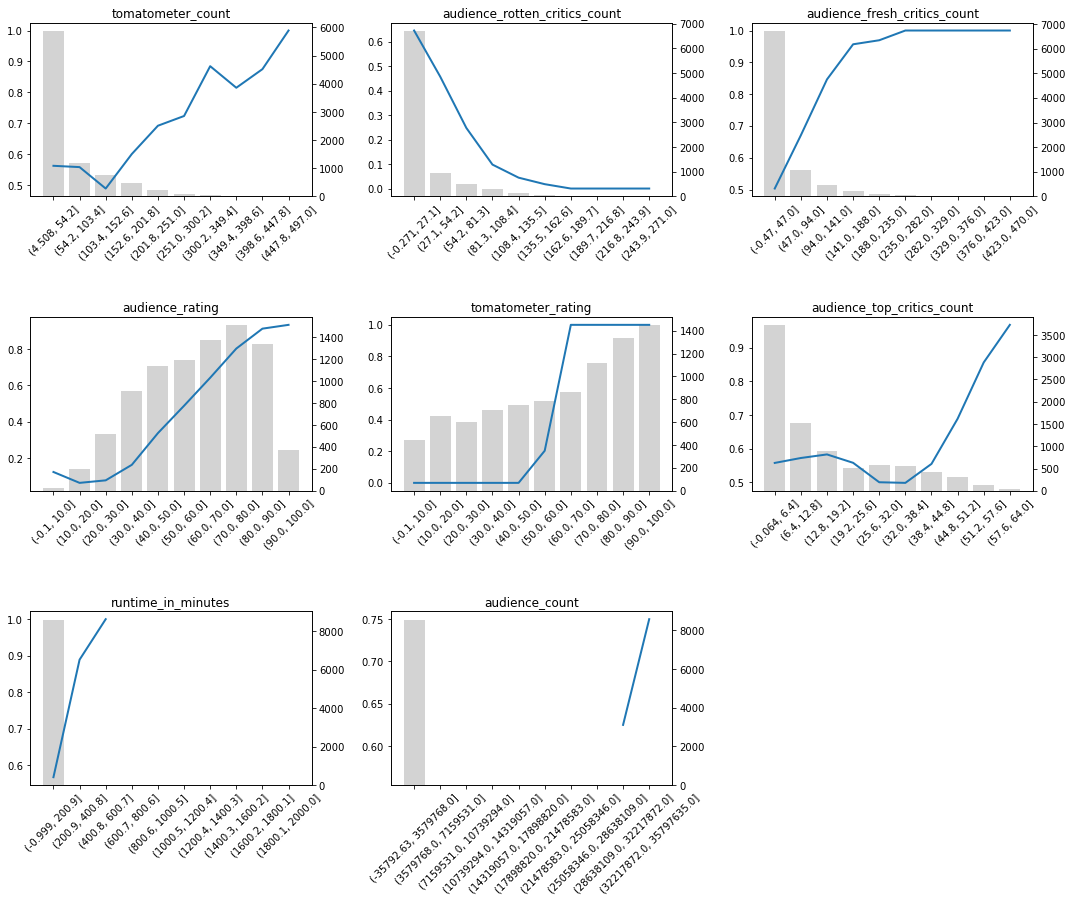

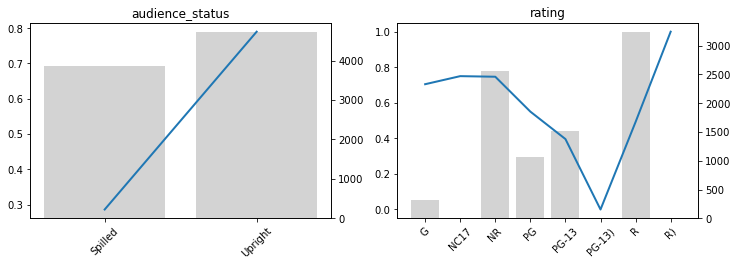

In [40]:
y_col = 'tm_status'
bivariate_plot(model_raw_data_2,y_col, binary =True)

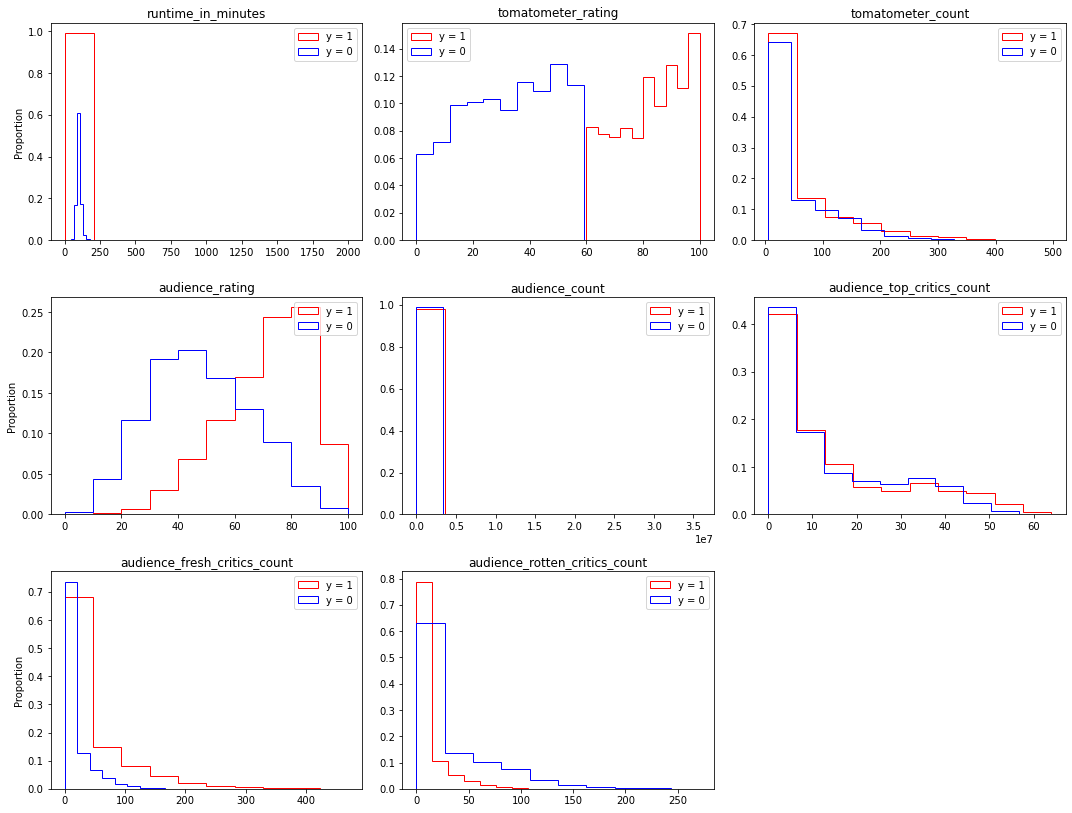

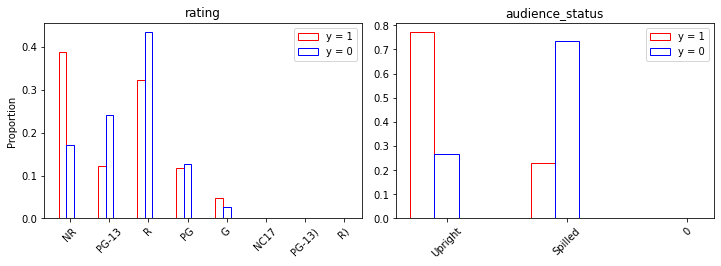

In [41]:
two_group_histplot(model_raw_data_2,y_col)

In [42]:
to_drop3 = ['tomatometer_rating', 'audience_count']
model_raw_data_3 = model_raw_data_2.drop(to_drop3, axis = 1)
model_raw_data_3.head()

,rating,runtime_in_minutes,tomatometer_count,audience_status,audience_rating,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,tm_status
0,NR,70.0,15,Upright,79.0,5,14,1,1
1,NR,90.0,9,Spilled,19.0,5,1,8,0
2,PG-13,124.0,219,Spilled,50.0,46,97,122,0
3,R,97.0,31,Spilled,56.0,10,18,13,0
4,R,99.0,39,Upright,64.0,12,11,28,0


In [43]:
dummy_df = pd.get_dummies(model_raw_data_3[['rating','audience_status']])

In [44]:
dummy_df.head()

,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_PG-13),rating_R,rating_R),audience_status_Spilled,audience_status_Upright
0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,1,0,0,1


In [47]:
dummy_keep = ['audience_status_Upright', 'rating_NR']
model_data = pd.concat([model_raw_data_3, dummy_df[dummy_keep]], axis = 1)

model_data.head()

,rating,runtime_in_minutes,tomatometer_count,audience_status,audience_rating,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,tm_status,audience_status_Upright,rating_NR
0,NR,70.0,15,Upright,79.0,5,14,1,1,1,1
1,NR,90.0,9,Spilled,19.0,5,1,8,0,0,1
2,PG-13,124.0,219,Spilled,50.0,46,97,122,0,0,0
3,R,97.0,31,Spilled,56.0,10,18,13,0,0,0
4,R,99.0,39,Upright,64.0,12,11,28,0,1,0


In [49]:
missing_value_summary(model_data, y_col)

,tot count,missing,missing %,non-missing avg,missing avg
rating,8701,0,0.00,0.565682,NaN
runtime_in_minutes,8701,73,0.84,0.567455,0.356164
tomatometer_count,8701,0,0.00,0.565682,NaN
audience_status,8701,127,1.46,0.563564,0.708661
audience_rating,8701,127,1.46,0.563564,0.708661
audience_top_critics_count,8701,0,0.00,0.565682,NaN
audience_fresh_critics_count,8701,0,0.00,0.565682,NaN
audience_rotten_critics_count,8701,0,0.00,0.565682,NaN
tm_status,8701,0,0.00,0.565682,NaN
audience_status_Upright,8701,0,0.00,0.565682,NaN


In [50]:
model_data.columns.to_list()

['rating',
 'runtime_in_minutes',
 'tomatometer_count',
 'audience_status',
 'audience_rating',
 'audience_top_critics_count',
 'audience_fresh_critics_count',
 'audience_rotten_critics_count',
 'tm_status',
 'audience_status_Upright',
 'rating_NR']

In [52]:
model_vars = [
    #'rating',
 #'runtime_in_minutes',
 #'tomatometer_count',
 #'audience_status',
 'audience_rating',
 'audience_top_critics_count',
 'audience_fresh_critics_count',
 'audience_rotten_critics_count',
# 'tm_status',
 'audience_status_Upright',
 'rating_NR']

In [53]:
train,test = train_test_split(model_data[model_vars + [y_col]], train_size = 0.7)

In [54]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()


In [57]:
train[['audience_rating']] = imp.fit_transform(train[['audience_rating']])

In [58]:
test[['audience_rating']] = imp.transform(test[['audience_rating']])

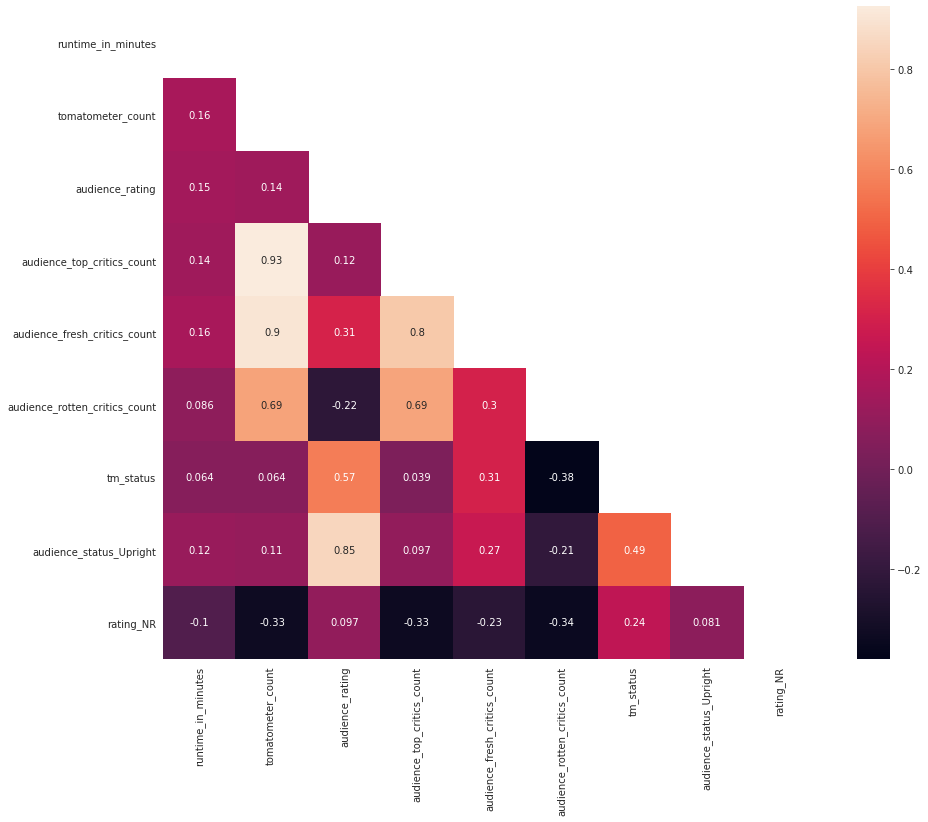

In [59]:
cor = model_data.corr()
heatmap_corr(cor)

In [60]:
model_vars = [
 'audience_rating',
 'audience_top_critics_count',
 'audience_fresh_critics_count',
 'audience_rotten_critics_count',
 'audience_status_Upright',
 'rating_NR']

In [62]:
rf_clf = RandomForestClassifier()
hp = GridSearchCV(
    rf_clf,
    param_grid={
        #'n_estimators': [80,120,160],
        'max_depth': range(6,10,2),
        'min_samples_leaf':range(1,5,2)
    },
    cv = KFold(shuffle=True),
    n_jobs=-1
).fit(train[model_vars], train[y_col])

In [63]:
hp.best_estimator_

RandomForestClassifier(max_depth=8)

In [64]:
rf_mod = hp.best_estimator_.fit(train[model_vars], train[y_col])

In [65]:
from sklean_utils import clf_metrics

,metric,Score
0,Acuracy,0.9793
1,AUC ROC,0.9986
2,Precision,0.9818
3,Recall,0.9813
4,F1 Score,0.9816


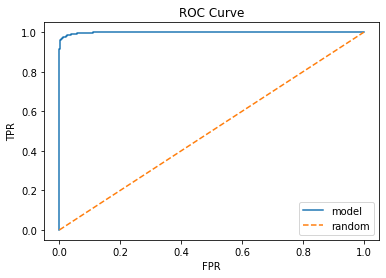

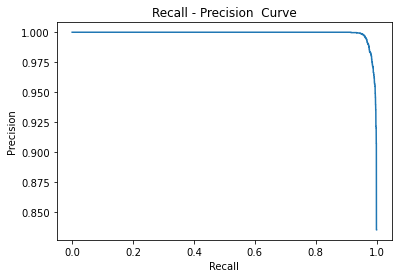

,metric,Score
0,Acuracy,0.9793
1,AUC ROC,0.9986
2,Precision,0.9818
3,Recall,0.9813
4,F1 Score,0.9816


In [67]:
clf_metrics(rf_mod, train[model_vars], train[y_col])

,metric,Score
0,Acuracy,0.9671
1,AUC ROC,0.9962
2,Precision,0.9671
3,Recall,0.9761
4,F1 Score,0.9716


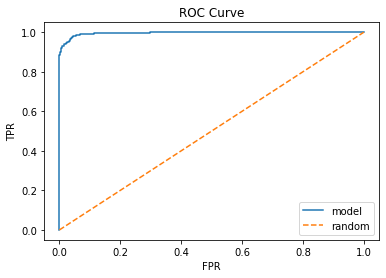

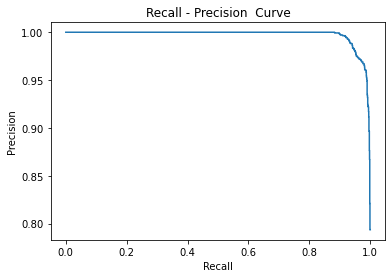

,metric,Score
0,Acuracy,0.9671
1,AUC ROC,0.9962
2,Precision,0.9671
3,Recall,0.9761
4,F1 Score,0.9716


In [68]:
clf_metrics(rf_mod, test[model_vars], test[y_col])

In [69]:
var_importance(rf_mod, model_vars)

,Importance,cumsum
audience_rotten_critics_count,0.323414,0.323
audience_fresh_critics_count,0.269916,0.593
audience_rating,0.201648,0.795
audience_status_Upright,0.117212,0.912
audience_top_critics_count,0.059176,0.971
rating_NR,0.028634,1.000
